# Несбалансированные выборки. Практическая работа

## Цель практической работы

Научиться обрабатывать несбалансированные данные и обучать модели машинного обучения на таких данных.

## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Разделить данные на обучающую и тестовую выборки.
3. Подготовить данные для моделирования.
4. Сбалансировать данные методом SMOTE и обучить модель машинного обучения.
5. Обучить модель машинного обучения с использованием весов классов и кросс-валидации.
6. Сравнить метрики качества четырёх моделей.




## Что оценивается 

- Выполнены все этапы работы.
- Не допущена утечка данных при разделении выборок и подготовке данных.
- Данные корректным образом сбалансированы.
- Модели не переобучены.


## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.


# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита. 
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту. 



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\A315-23-R

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\A315-23-R

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\A315-23-R

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\A315-23-R

AttributeError: _ARRAY_API not found

In [2]:
data = pd.read_csv('german_credit_data.csv')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [5]:
data.shape

(1000, 10)

In [6]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
for feature in features:
    print(f'Для признака {feature} уникальные значения ', data[feature].value_counts())

Для признака Age уникальные значения  Age
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
44    17
41    17
43    17
47    17
45    15
21    14
49    14
20    14
50    12
48    12
54    10
57     9
52     9
63     8
51     8
55     8
53     7
61     7
60     6
66     5
65     5
58     5
64     5
74     4
67     3
56     3
59     3
68     3
19     2
75     2
62     2
70     1
Name: count, dtype: int64
Для признака Sex уникальные значения  Sex
male      690
female    310
Name: count, dtype: int64
Для признака Job уникальные значения  Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64
Для признака Housing уникальные значения  Housing
own     713
rent    179
free    108
Name: count, dtype: int64
Для признака Saving accounts уникальные значения  Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name:

In [7]:
data['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

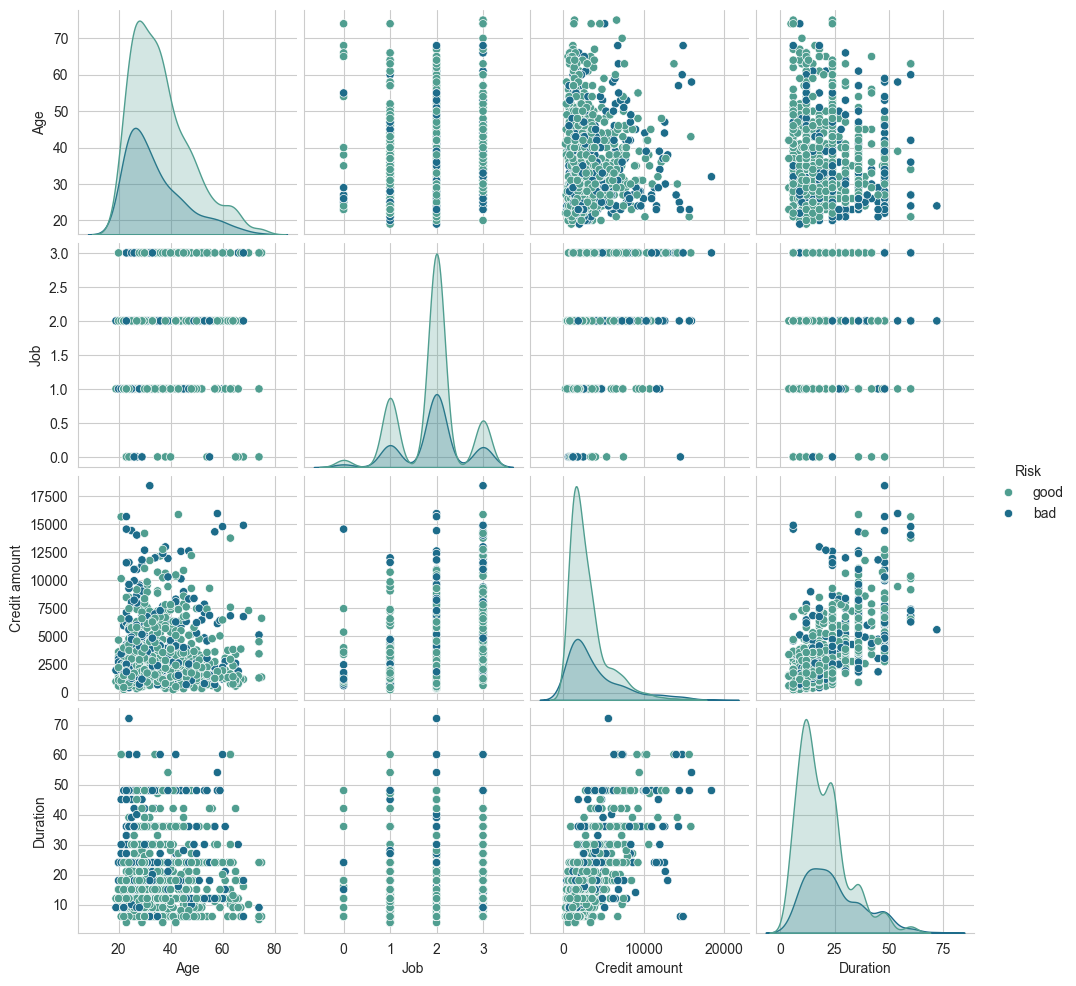

In [8]:
sns.set_style("whitegrid")
plt.figure()
sns.pairplot(data, 
             hue='Risk', palette='crest')
plt.show()

# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [9]:
#X = data.copy()
#X = X.drop(['Risk'], axis=1)

#y = data['Risk']

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['Risk'], train_size=0.8, random_state=1)
data_train, data_test = train_test_split(data, stratify=data['Risk'], train_size=0.8, random_state=1)

# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

In [10]:
# Два признака Saving accounts и Checking account имеют большое количество незаполненных ячеек. 
# Это незаполнение составляет существенную часть от всего датасета, поэтому просто удалить эти строки не представляется возможным.
# Воспользуемся методом fillna() и заменим пропуски на значение not info

data_train['Saving accounts'] = data_train['Saving accounts'].fillna('not info')
data_train['Saving accounts'].isna().sum()

np.int64(0)

In [11]:
data_train['Checking account'] = data_train['Checking account'].fillna('not info')
data_train['Checking account'].isna().sum()

np.int64(0)

In [12]:
data_test['Saving accounts'] = data_test['Saving accounts'].fillna('not info')
data_test['Saving accounts'].isna().sum()

np.int64(0)

In [13]:
data_test['Checking account'] = data_test['Checking account'].fillna('not info')
data_test['Checking account'].isna().sum()

np.int64(0)

In [14]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe

OneHotEncoder(drop='first', sparse_output=False)

In [15]:
ohe.fit(data_train[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])

OneHotEncoder(drop='first', sparse_output=False)

In [16]:
ohe_tr = ohe.transform(data_train[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])
ohe_tr

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(800, 17))

In [17]:
ohe.get_feature_names_out()

array(['Sex_male', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_not info',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_not info',
       'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'], dtype=object)

In [18]:
data_train[ohe.get_feature_names_out()] = ohe_tr
data_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_moderate,Checking account_not info,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
561,24,male,1,rent,little,little,1546,24,radio/TV,bad,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,22,female,2,rent,little,little,3632,24,car,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
352,38,male,3,own,not info,not info,3229,18,car,good,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
568,41,male,2,own,not info,moderate,3979,48,radio/TV,good,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,26,female,2,own,little,moderate,9960,48,furniture/equipment,bad,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
data_train['Risk'] = data_train['Risk'].replace('bad', 1)
data_train['Risk'] = data_train['Risk'].replace('good', 0)
data_train.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_6700\1798944134.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train['Risk'] = data_train['Risk'].replace('good', 0)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_moderate,Checking account_not info,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
561,24,male,1,rent,little,little,1546,24,radio/TV,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,22,female,2,rent,little,little,3632,24,car,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
352,38,male,3,own,not info,not info,3229,18,car,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
568,41,male,2,own,not info,moderate,3979,48,radio/TV,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,26,female,2,own,little,moderate,9960,48,furniture/equipment,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
for_drop = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
data_train = data_train.drop(for_drop, axis=1)
data_train.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_not info,...,Checking account_moderate,Checking account_not info,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
561,24,1,1546,24,1,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,22,2,3632,24,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
352,38,3,3229,18,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
568,41,2,3979,48,0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,26,2,9960,48,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
ohe1 = OneHotEncoder(sparse_output=False, drop='first')
ohe1

OneHotEncoder(drop='first', sparse_output=False)

In [22]:
ohe1.fit(data_test[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])

OneHotEncoder(drop='first', sparse_output=False)

In [23]:
ohe1_tr = ohe1.transform(data_test[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])
ohe1_tr

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]], shape=(200, 17))

In [24]:
data_test[ohe.get_feature_names_out()] = ohe1_tr

data_test['Risk'] = data_test['Risk'].replace('bad', 1)
data_test['Risk'] = data_test['Risk'].replace('good', 0)

data_test = data_test.drop(for_drop, axis=1)
data_test.head()

C:\Users\A315-23-R7CZ\AppData\Local\Temp\ipykernel_6700\810210264.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['Risk'] = data_test['Risk'].replace('good', 0)


,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_not info,...,Checking account_moderate,Checking account_not info,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
586,36,2,2799,9,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
803,35,2,976,12,0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
846,68,2,6761,18,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
932,30,2,1224,9,0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
788,50,2,6224,48,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [25]:
os = SMOTE(random_state=1, k_neighbors=2)

In [26]:
data_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_not info', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_not info', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [27]:
data_test.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_not info', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_not info', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [28]:
features = ['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 
            'Housing_own', 'Housing_rent', 'Saving accounts_moderate',
            'Saving accounts_not info', 'Saving accounts_quite rich', 
            'Saving accounts_rich', 'Checking account_moderate',
            'Checking account_not info', 'Checking account_rich', 'Purpose_car',
            'Purpose_domestic appliances', 'Purpose_education',
            'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs','Purpose_vacation/others']
target = 'Risk'

In [29]:
X_train, y_train = os.fit_resample(data_train[features], data_train[target])

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\A315-23-R7CZ\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid

In [30]:
y_train.value_counts()

Risk
1    560
0    560
Name: count, dtype: int64

In [31]:
model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)

print(f'Лучшие параметры: {grid_search.best_params_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Лучшие параметры: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [32]:
model1 = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', 
                                min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=1)

In [33]:
model1.fit(X_train, y_train)

X_test, y_test = data_test[features], data_test[target]

print(roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1]))

0.7764285714285715


# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [34]:
model2 = RandomForestClassifier(random_state=1, class_weight='balanced')

X_train1, y_train1 = data_train[features], data_train[target]

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search1 = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='roc_auc'
)

grid_search1.fit(X_train1, y_train1)

print(f'Лучшие параметры: {grid_search1.best_params_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Лучшие параметры: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [35]:
model3 = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', 
                                min_samples_leaf=1, min_samples_split=10, n_estimators=50, 
                                random_state=1, class_weight='balanced')

In [38]:
model3.fit(X_train1, y_train1)

X_test, y_test = data_test[features], data_test[target]

print(roc_auc_score(y_test, model3.predict_proba(X_test)[:, 1]))

0.7892857142857144
